In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [32]:
import os

train_path = '/content/drive/My Drive/train'
test_path = '/content/drive/My Drive/test1'

print("Train Folder Contents:", os.listdir(train_path))
print("Test Folder Contents:", os.listdir(test_path))


Train Folder Contents: ['dog.9189.jpg', 'dog.9199.jpg', 'dog.9186.jpg', 'dog.9185.jpg', 'dog.9201.jpg', 'dog.9203.jpg', 'dog.9194.jpg', 'dog.9192.jpg', 'dog.9197.jpg', 'dog.9183.jpg', 'dog.9193.jpg', 'dog.9207.jpg', 'dog.919.jpg', 'dog.9206.jpg', 'dog.9212.jpg', 'dog.9202.jpg', 'dog.9200.jpg', 'dog.9205.jpg', 'dog.9211.jpg', 'dog.9191.jpg', 'dog.9245.jpg', 'dog.9239.jpg', 'dog.9229.jpg', 'dog.9243.jpg', 'dog.9223.jpg', 'dog.9222.jpg', 'dog.923.jpg', 'dog.9238.jpg', 'dog.9247.jpg', 'dog.9231.jpg', 'dog.9226.jpg', 'dog.9244.jpg', 'dog.9225.jpg', 'dog.9224.jpg', 'dog.9230.jpg', 'dog.9227.jpg', 'dog.9234.jpg', 'dog.9237.jpg', 'dog.9216.jpg', 'dog.9220.jpg', 'dog.9215.jpg', 'dog.9248.jpg', 'dog.9233.jpg', 'dog.9219.jpg', 'dog.9240.jpg', 'dog.9235.jpg', 'dog.922.jpg', 'dog.9246.jpg', 'dog.9221.jpg', 'dog.9242.jpg', 'dog.924.jpg', 'dog.9218.jpg', 'dog.9228.jpg', 'dog.9241.jpg', 'dog.9232.jpg', 'dog.9217.jpg', 'dog.9236.jpg', 'dog.9250.jpg', 'dog.9251.jpg', 'dog.9276.jpg', 'dog.9271.jpg', 'dog

In [28]:
import os
import shutil

In [35]:
import os
import shutil

def remove_nested_folders(directory):
    """
    Removes all nested folders in the given directory and moves files to the root directory.

    Args:
        directory (str): Path to the root directory (e.g., train or test folder).
    """
    for root, subdirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            # Move the file to the root directory
            if root != directory:  # If not already in the root
                shutil.move(file_path, os.path.join(directory, file))
                print(f"Moved: {file_path} to {directory}")

    # Remove all empty folders after moving the files
    for root, subdirs, _ in os.walk(directory, topdown=False):
        for subdir in subdirs:
            subdir_path = os.path.join(root, subdir)
            if not os.listdir(subdir_path):
                os.rmdir(subdir_path)
                print(f"Removed empty folder: {subdir_path}")

# Example usage for both train and test datasets
train_dir = '/content/drive/My Drive/train'
test_dir = '/content/drive/My Drive/test1'

print("Cleaning train dataset...")
remove_nested_folders(train_dir)

print("Cleaning test dataset...")
remove_nested_folders(test_dir)


Streaming output truncated to the last 5000 lines.
Moved: /content/drive/My Drive/train/Dog/dog.3445.jpg to /content/drive/My Drive/train
Moved: /content/drive/My Drive/train/Dog/dog.3451.jpg to /content/drive/My Drive/train
Moved: /content/drive/My Drive/train/Dog/dog.3440.jpg to /content/drive/My Drive/train
Moved: /content/drive/My Drive/train/Dog/dog.3442.jpg to /content/drive/My Drive/train
Moved: /content/drive/My Drive/train/Dog/dog.3458.jpg to /content/drive/My Drive/train
Moved: /content/drive/My Drive/train/Dog/dog.3454.jpg to /content/drive/My Drive/train
Moved: /content/drive/My Drive/train/Dog/dog.345.jpg to /content/drive/My Drive/train
Moved: /content/drive/My Drive/train/Dog/dog.3464.jpg to /content/drive/My Drive/train
Moved: /content/drive/My Drive/train/Dog/dog.3459.jpg to /content/drive/My Drive/train
Moved: /content/drive/My Drive/train/Dog/dog.3460.jpg to /content/drive/My Drive/train
Moved: /content/drive/My Drive/train/Dog/dog.3467.jpg to /content/drive/My Drive

In [36]:
import os
import shutil

# Define the path for the train directory
train_path = '/content/drive/My Drive/train'

# Define paths for the Cat and Dog directories within the train directory
cat_dir = os.path.join(train_path, 'cat')  # Create /train/cat
dog_dir = os.path.join(train_path, 'dog')  # Create /train/dog

# Create class directories (cat and dog)
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Move images to respective folders based on their filenames
for filename in os.listdir(train_path):
    file_path = os.path.join(train_path, filename)
    # Check if it's a file, not a directory
    if os.path.isfile(file_path):
        print(f"Processing file: {filename}")
        if 'cat' in filename.lower():
            shutil.move(file_path, os.path.join(cat_dir, filename))
            print(f"Moved {filename} to {cat_dir}")
        elif 'dog' in filename.lower():
            shutil.move(file_path, os.path.join(dog_dir, filename))
            print(f"Moved {filename} to {dog_dir}")

# Print the results
print("\nCat directory contains:", os.listdir(cat_dir))
print("Dog directory contains:", os.listdir(dog_dir))


Streaming output truncated to the last 5000 lines.
Moved cat.12341.jpg to /content/drive/My Drive/train/cat
Processing file: cat.1234.jpg
Moved cat.1234.jpg to /content/drive/My Drive/train/cat
Processing file: cat.12356.jpg
Moved cat.12356.jpg to /content/drive/My Drive/train/cat
Processing file: cat.12355.jpg
Moved cat.12355.jpg to /content/drive/My Drive/train/cat
Processing file: cat.1238.jpg
Moved cat.1238.jpg to /content/drive/My Drive/train/cat
Processing file: cat.12366.jpg
Moved cat.12366.jpg to /content/drive/My Drive/train/cat
Processing file: cat.12372.jpg
Moved cat.12372.jpg to /content/drive/My Drive/train/cat
Processing file: cat.12353.jpg
Moved cat.12353.jpg to /content/drive/My Drive/train/cat
Processing file: cat.12360.jpg
Moved cat.12360.jpg to /content/drive/My Drive/train/cat
Processing file: cat.1236.jpg
Moved cat.1236.jpg to /content/drive/My Drive/train/cat
Processing file: cat.12351.jpg
Moved cat.12351.jpg to /content/drive/My Drive/train/cat
Processing file: c

In [13]:
# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model's layers
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])



<ipython-input-13-c5556c8753cc>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


In [26]:
# Use ImageDataGenerator for data loading and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of training data used for validation
)

# Train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [37]:
img_size = (150, 150)
batch_size = 128  # Optimized batch size for speed and memory efficiency

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Only rescale images
    validation_split=0.2  # Split training data into training and validation
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [38]:
# Print class labels mapping
print(train_generator.class_indices)


{'cat': 0, 'dog': 1}


In [41]:
num_train_samples = sum(len(files) for _, _, files in os.walk(os.path.join(train_path)))
num_validation_samples = num_train_samples * 0.2

In [42]:
steps_per_epoch = num_train_samples // batch_size
validation_steps = int(num_validation_samples) // batch_size

In [40]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [43]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=steps_per_epoch,  # Use all training data per epoch
    validation_steps=validation_steps,
    epochs=5  # Adjust based on runtime needs
)


Epoch 1/5
157/195 ━━━━━━━━━━━━━━━━━━━━ 22s 585ms/step - accuracy: 0.9673 - loss: 0.0846

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


195/195 ━━━━━━━━━━━━━━━━━━━━ 130s 614ms/step - accuracy: 0.9670 - loss: 0.0848 - val_accuracy: 0.9623 - val_loss: 0.0944
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 117s 578ms/step - accuracy: 0.9695 - loss: 0.0770 - val_accuracy: 1.0000 - val_loss: 0.0324
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 118s 585ms/step - accuracy: 0.9719 - loss: 0.0716 - val_accuracy: 0.9649 - val_loss: 0.0829
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 114s 435ms/step - accuracy: 0.9774 - loss: 0.0605 - val_accuracy: 0.8750 - val_loss: 0.1240
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 162s 544ms/step - accuracy: 0.9785 - loss: 0.0573 - val_accuracy: 0.9625 - val_loss: 0.1000


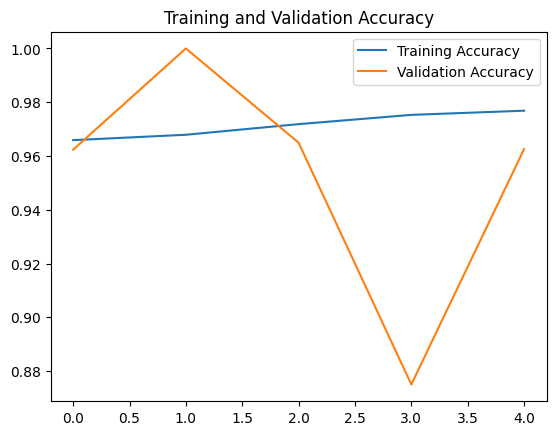

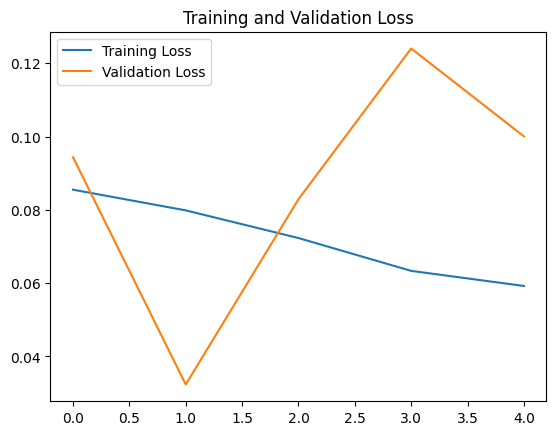

In [59]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Select an image to verify the prediction:


Dropdown(description='Select Image:', options=('9099.jpg', '9097.jpg', '9106.jpg', '9117.jpg', '9101.jpg', '91…

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


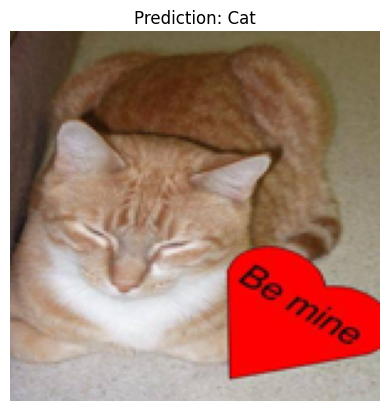

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


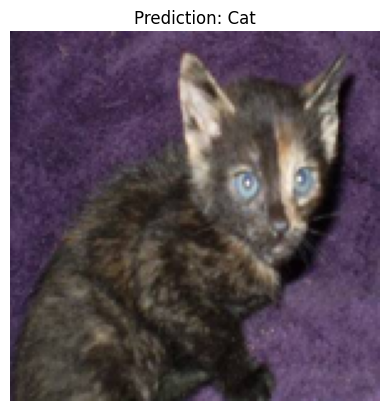

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


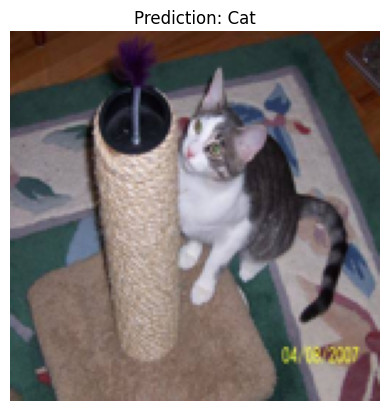

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


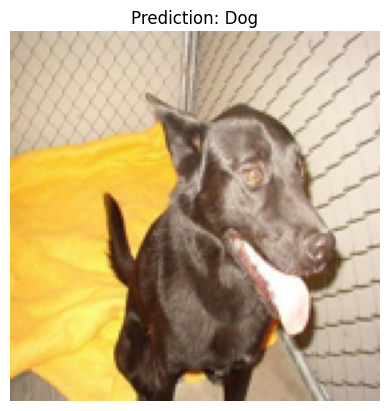

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


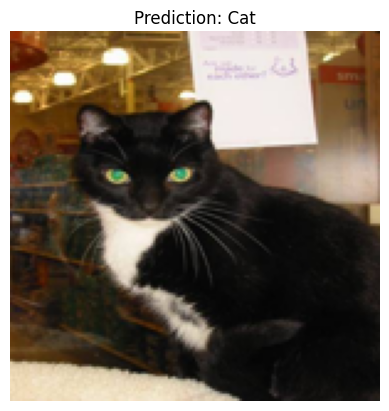

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


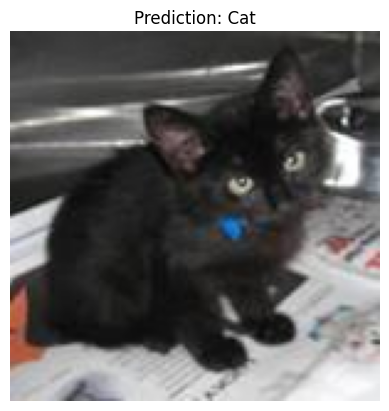

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


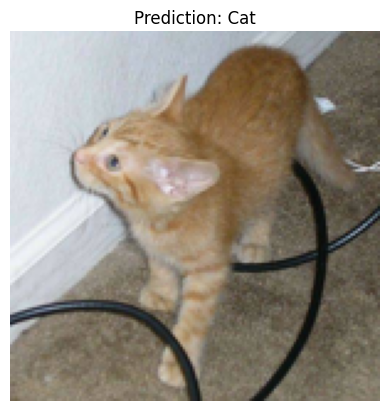

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


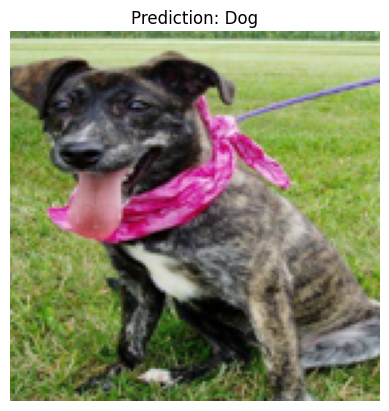

In [67]:
import os
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the test directory and load the trained model
test_dir = '/content/drive/My Drive/test1'
model = model  # Use the model you trained earlier

# Get all image filenames in the test directory
image_files = [f for f in os.listdir(test_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Dropdown widget for selecting an image
dropdown = widgets.Dropdown(
    options=image_files,
    description='Select Image:',
    style={'description_width': 'initial'}
)

# Function to make predictions and display the selected image
def display_prediction(change):
    selected_image = change.new
    image_path = os.path.join(test_dir, selected_image)

    # Load and preprocess the image
    img = Image.open(image_path).resize((150, 150))  # Resize to match model input size
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_class = 'Dog' if prediction > 0.5 else 'Cat'

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis('off')
    plt.show()

# Attach the function to the dropdown
dropdown.observe(display_prediction, names='value')

# Display the dropdown
print("Select an image to verify the prediction:")
display(dropdown)


In [64]:
test_path = '/content/drive/My Drive/test1'

In [63]:
import os

test_dir = '/content/drive/My Drive/test1'  # Update with your path
print("Test directory exists:", os.path.exists(test_dir))
print("Contents of test_dir:", os.listdir(test_dir))


Test directory exists: True
Contents of test_dir: ['9099.jpg', '9097.jpg', '9106.jpg', '9117.jpg', '9101.jpg', '9105.jpg', '9113.jpg', '9100.jpg', '9119.jpg', '9109.jpg', '9120.jpg', '9103.jpg', '9112.jpg', '9110.jpg', '911.jpg', '9115.jpg', '9111.jpg', '9118.jpg', '9096.jpg', '9102.jpg', '9104.jpg', '9114.jpg', '910.jpg', '9108.jpg', '91.jpg', '9107.jpg', '9125.jpg', '9145.jpg', '9121.jpg', '9141.jpg', '9127.jpg', '9135.jpg', '9138.jpg', '914.jpg', '913.jpg', '9124.jpg', '9131.jpg', '9147.jpg', '9129.jpg', '9139.jpg', '9144.jpg', '9132.jpg', '9146.jpg', '9128.jpg', '9123.jpg', '9140.jpg', '9126.jpg', '9142.jpg', '9134.jpg', '9122.jpg', '9136.jpg', '9137.jpg', '9130.jpg', '9133.jpg', '9143.jpg', '9161.jpg', '916.jpg', '9160.jpg', '9148.jpg', '9154.jpg', '9162.jpg', '9151.jpg', '9152.jpg', '9170.jpg', '9166.jpg', '9156.jpg', '9165.jpg', '915.jpg', '9169.jpg', '9157.jpg', '9150.jpg', '9164.jpg', '9158.jpg', '9149.jpg', '9155.jpg', '9168.jpg', '917.jpg', '9163.jpg', '9159.jpg', '9153.jpg'

In [66]:
print(test_generator.class_indices)

{}


In [61]:
import os
import shutil

def remove_nested_folders(directory):
    """
    Removes nested folders in the given directory and moves files to the root directory.

    Args:
        directory (str): Path to the directory to clean up.
    """
    for root, subdirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            # Move the file to the root directory if it's in a nested folder
            if root != directory:
                shutil.move(file_path, os.path.join(directory, file))
                print(f"Moved: {file_path} to {directory}")

    # Remove empty directories
    for root, subdirs, _ in os.walk(directory, topdown=False):
        for subdir in subdirs:
            subdir_path = os.path.join(root, subdir)
            if not os.listdir(subdir_path):  # If the folder is empty
                os.rmdir(subdir_path)
                print(f"Removed empty folder: {subdir_path}")

# Define the path to the test1 directory
test1_dir = '/content/drive/My Drive/test1'

# Clean up the test1 directory
print(f"Cleaning up nested folders in {test1_dir}...")
remove_nested_folders(test1_dir)

# Verify the cleaned-up structure
print("\nFinal structure of test1:")
for root, dirs, files in os.walk(test1_dir):
    print(f"{root}/")
    for file in files:
        print(f"  {file}")


Streaming output truncated to the last 5000 lines.
  3249.jpg
  3252.jpg
  3244.jpg
  3247.jpg
  3256.jpg
  326.jpg
  3261.jpg
  3250.jpg
  3257.jpg
  3245.jpg
  3241.jpg
  3254.jpg
  3233.jpg
  3255.jpg
  3231.jpg
  3258.jpg
  3284.jpg
  3292.jpg
  3279.jpg
  3263.jpg
  3293.jpg
  3276.jpg
  3273.jpg
  3267.jpg
  3270.jpg
  3290.jpg
  3278.jpg
  3272.jpg
  3271.jpg
  3262.jpg
  3283.jpg
  3264.jpg
  3280.jpg
  3286.jpg
  3277.jpg
  329.jpg
  328.jpg
  3268.jpg
  3281.jpg
  3265.jpg
  3287.jpg
  3269.jpg
  3275.jpg
  3289.jpg
  3282.jpg
  3274.jpg
  3288.jpg
  3266.jpg
  3285.jpg
  327.jpg
  3291.jpg
  330.jpg
  3316.jpg
  3303.jpg
  3301.jpg
  3320.jpg
  3302.jpg
  3310.jpg
  3306.jpg
  3305.jpg
  3314.jpg
  3319.jpg
  3313.jpg
  3304.jpg
  3300.jpg
  3325.jpg
  332.jpg
  3299.jpg
  3297.jpg
  33.jpg
  3295.jpg
  3322.jpg
  3326.jpg
  331.jpg
  3318.jpg
  3323.jpg
  3298.jpg
  3312.jpg
  3315.jpg
  3324.jpg
  3294.jpg
  3308.jpg
  3317.jpg
  3309.jpg
  3321.jpg
  3307.jpg
  3311.jpg
 

In [65]:
# Load and preprocess test data
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=1,
    class_mode=None,  # No labels for test data
    shuffle=False
)

# Predict on test data
predictions = model.predict(test_generator)
predicted_classes = ['Dog' if pred > 0.5 else 'Cat' for pred in predictions]


Found 0 images belonging to 0 classes.


ValueError: Must provide at least one structure

ValueError: Asked to retrieve element 0, but the Sequence has length 0

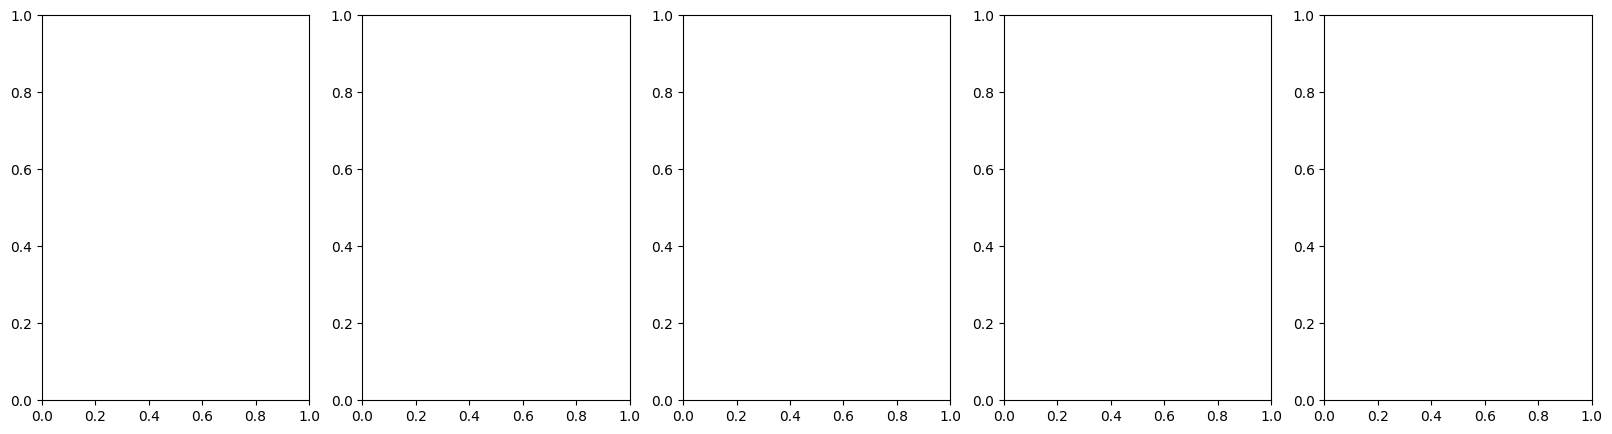

In [58]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    img = test_generator[i][0]
    ax.imshow(img)
    ax.set_title(f'Prediction: {predicted_classes[i]}')
    ax.axis('off')
plt.show()